In [486]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [487]:
data = pd.read_csv('bsas_realstate_on_sale_properati_dataset_2020.csv' , sep=",")
data

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


In [488]:
data.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [489]:
data.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [490]:
data["l1"].value_counts()

Argentina    146660
Name: l1, dtype: int64

In [491]:
data["l2"].value_counts()

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

In [492]:
data["l3"].value_counts()

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64

In [493]:
data["currency"].value_counts()

USD    146660
Name: currency, dtype: int64

In [494]:
data["property_type"].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

In [495]:
data["operation_type"].value_counts()

Venta    146660
Name: operation_type, dtype: int64

In [496]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [497]:
data.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [498]:
keyword_1 = ['pileta']
keyword_2 = ['jardin']
data['pool'] = data['description'].str.findall('|'.join(keyword_1)).apply(set).str.join(', ')
data['garden'] = data['description'].str.findall('|'.join(keyword_2)).apply(set).str.join(', ')
data

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,pool,garden
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,,
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,,
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,,
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,,
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta,,
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta,pileta,
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta,,
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta,,


In [499]:
pd.options.display.max_columns = len(data.columns)
data.head(10)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,pool,garden
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,,
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,,
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,,
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,,
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta,,
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,,
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta,,
7,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta,,
8,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta,,
9,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta,,


In [500]:
data = data.dropna(subset=['surface_total'])
data.shape

(126133, 21)

In [501]:
data = data.sort_values(by='lon' , ascending=True)
data

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,pool,garden
94329,2020-01-17,2020-01-21,2020-01-17,-34.645869,-59.104646,Argentina,Bs.As. G.B.A. Zona Oeste,General Rodríguez,6.0,5.0,3.0,10005.0,NaN,265000.0,USD,Chacra Club de Campo Las Lilas,Corredor Responsable: Hernan Perrone - Corredo...,Otro,Venta,,
56672,2019-04-26,2019-08-17,2019-04-26,-34.673806,-59.042416,Argentina,Bs.As. G.B.A. Zona Oeste,General Rodríguez,4.0,1.0,1.0,1000.0,86.0,125000.0,USD,Venta casa aero country club,Corredor Responsable: Hernan Perrone - CMCPDJM...,Casa,Venta,,
130136,2019-03-13,9999-12-31,2019-03-13,-34.674553,-59.039994,Argentina,Bs.As. G.B.A. Zona Oeste,General Rodríguez,4.0,2.0,2.0,1000.0,276.0,195000.0,USD,CASA CON HANGAR AERO COUNTRY CLUB,"CASA A TERMINAR CON HANGAR.AERO COUNTRY CLUB, ...",Casa,Venta,,
14153,2019-12-27,9999-12-31,2019-12-27,-34.606226,-59.038897,Argentina,Bs.As. G.B.A. Zona Oeste,General Rodríguez,6.0,4.0,2.0,1600.0,22443.0,275000.0,USD,Casa en venta-Club de Campo Barrio Haras San P...,Corredor Responsable: Lucrecia Saulle - CSI 55...,Casa,Venta,,
79038,2019-05-15,2019-10-10,2019-05-15,-34.606155,-59.038725,Argentina,Bs.As. G.B.A. Zona Oeste,General Rodríguez,5.0,3.0,2.0,1500.0,160.0,245000.0,USD,Casa a estrenar Club de campo Haras San Pablo,Corredor Responsable: MARTIN DAMBOLENA - CMCPD...,Casa,Venta,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146571,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,2.0,57.0,46.0,120000.0,USD,VENTA - DEPARTAMENTO 2 AMBIENTES - CONTRAFRENT...,•Venta Departamentos en Complejo “Jardines del...,Departamento,Venta,,
146575,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,2.0,1.0,2.0,64.0,56.0,141000.0,USD,VENTA - DEPARTAMENTO 2 AMBIENTES TIPO DUPLEX- ...,•Venta Departamentos en Complejo “Jardines del...,Departamento,Venta,,
146577,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,89.0,71.0,167000.0,USD,VENTA - DEPARTAMENTO 3 AMBIENTES AL RÍO - JARD...,•Venta Departamentos en Complejo “Jardines del...,Departamento,Venta,,
146578,2019-07-31,2019-08-14,2019-07-31,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,89.0,71.0,167000.0,USD,VENTA - DEPARTAMENTO 3 AMBIENTES AL RÍO - JARD...,•Venta Departamentos en Complejo “Jardines del...,Departamento,Venta,,


In [502]:
data = data.loc[data['lon'] > -64]
data

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,pool,garden
94329,2020-01-17,2020-01-21,2020-01-17,-34.645869,-59.104646,Argentina,Bs.As. G.B.A. Zona Oeste,General Rodríguez,6.0,5.0,3.0,10005.0,NaN,265000.0,USD,Chacra Club de Campo Las Lilas,Corredor Responsable: Hernan Perrone - Corredo...,Otro,Venta,,
56672,2019-04-26,2019-08-17,2019-04-26,-34.673806,-59.042416,Argentina,Bs.As. G.B.A. Zona Oeste,General Rodríguez,4.0,1.0,1.0,1000.0,86.0,125000.0,USD,Venta casa aero country club,Corredor Responsable: Hernan Perrone - CMCPDJM...,Casa,Venta,,
130136,2019-03-13,9999-12-31,2019-03-13,-34.674553,-59.039994,Argentina,Bs.As. G.B.A. Zona Oeste,General Rodríguez,4.0,2.0,2.0,1000.0,276.0,195000.0,USD,CASA CON HANGAR AERO COUNTRY CLUB,"CASA A TERMINAR CON HANGAR.AERO COUNTRY CLUB, ...",Casa,Venta,,
14153,2019-12-27,9999-12-31,2019-12-27,-34.606226,-59.038897,Argentina,Bs.As. G.B.A. Zona Oeste,General Rodríguez,6.0,4.0,2.0,1600.0,22443.0,275000.0,USD,Casa en venta-Club de Campo Barrio Haras San P...,Corredor Responsable: Lucrecia Saulle - CSI 55...,Casa,Venta,,
79038,2019-05-15,2019-10-10,2019-05-15,-34.606155,-59.038725,Argentina,Bs.As. G.B.A. Zona Oeste,General Rodríguez,5.0,3.0,2.0,1500.0,160.0,245000.0,USD,Casa a estrenar Club de campo Haras San Pablo,Corredor Responsable: MARTIN DAMBOLENA - CMCPD...,Casa,Venta,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23873,2019-05-23,2019-08-17,2019-05-23,-34.950759,-57.840685,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,8.0,3.0,1.0,1250.0,175.0,230000.0,USD,"Casa en Venta Barrio La Hermosura, La Plata",Corredor Responsable: Rico Sebastián - Martill...,Casa,Venta,,
51679,2019-03-24,2019-08-17,2019-03-24,-34.954455,-57.837698,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,4.0,3.0,1.0,190.0,160.0,176000.0,USD,VENTA CASA LA HERMOSURA - 642 E/130 Y 131 -,Corredor Responsable: Mauro Perri - CDCPDJLP 7...,Casa,Venta,,
6862,2019-11-02,2019-11-04,2019-11-02,-34.955680,-57.833539,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,3.0,2.0,1.0,380.0,80.0,78000.0,USD,"Casa 2 dorm. con parque, en venta La Hermosura",Corredor Responsable: Marcelo Di Girolamo - C....,Casa,Venta,,
74480,2019-03-14,2019-08-17,2019-03-14,-34.955680,-57.833539,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,3.0,2.0,2.0,380.0,80.0,78000.0,USD,"Casa 2 dorm. con parque, en venta La Hermosura",Corredor Responsable: Marcelo Di Girolamo - C....,Casa,Venta,,


In [503]:
data = data.dropna(subset=['lon'])
data.shape

(117579, 21)

In [504]:
data = data.dropna(subset=['lat'])
data.shape

(117579, 21)

In [505]:
data = data.dropna(subset=['surface_covered'])
data.shape

(116073, 21)

In [506]:
data = data.fillna(1.0)
data

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,pool,garden
56672,2019-04-26,2019-08-17,2019-04-26,-34.673806,-59.042416,Argentina,Bs.As. G.B.A. Zona Oeste,General Rodríguez,4.0,1.0,1.0,1000.0,86.0,125000.0,USD,Venta casa aero country club,Corredor Responsable: Hernan Perrone - CMCPDJM...,Casa,Venta,,
130136,2019-03-13,9999-12-31,2019-03-13,-34.674553,-59.039994,Argentina,Bs.As. G.B.A. Zona Oeste,General Rodríguez,4.0,2.0,2.0,1000.0,276.0,195000.0,USD,CASA CON HANGAR AERO COUNTRY CLUB,"CASA A TERMINAR CON HANGAR.AERO COUNTRY CLUB, ...",Casa,Venta,,
14153,2019-12-27,9999-12-31,2019-12-27,-34.606226,-59.038897,Argentina,Bs.As. G.B.A. Zona Oeste,General Rodríguez,6.0,4.0,2.0,1600.0,22443.0,275000.0,USD,Casa en venta-Club de Campo Barrio Haras San P...,Corredor Responsable: Lucrecia Saulle - CSI 55...,Casa,Venta,,
79038,2019-05-15,2019-10-10,2019-05-15,-34.606155,-59.038725,Argentina,Bs.As. G.B.A. Zona Oeste,General Rodríguez,5.0,3.0,2.0,1500.0,160.0,245000.0,USD,Casa a estrenar Club de campo Haras San Pablo,Corredor Responsable: MARTIN DAMBOLENA - CMCPD...,Casa,Venta,,
44354,2020-01-16,2020-01-16,2020-01-16,-34.594796,-59.032360,Argentina,Bs.As. G.B.A. Zona Oeste,General Rodríguez,3.0,2.0,1.0,300.0,106.0,79000.0,USD,CASA VENTA 3 AMBIENTES GRAL RODRIGUEZ CON COCHERA,Corredor Responsable: Jorge Roca - CMCPSM 2550...,Casa,Venta,pileta,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23873,2019-05-23,2019-08-17,2019-05-23,-34.950759,-57.840685,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,8.0,3.0,1.0,1250.0,175.0,230000.0,USD,"Casa en Venta Barrio La Hermosura, La Plata",Corredor Responsable: Rico Sebastián - Martill...,Casa,Venta,,
51679,2019-03-24,2019-08-17,2019-03-24,-34.954455,-57.837698,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,4.0,3.0,1.0,190.0,160.0,176000.0,USD,VENTA CASA LA HERMOSURA - 642 E/130 Y 131 -,Corredor Responsable: Mauro Perri - CDCPDJLP 7...,Casa,Venta,,
6862,2019-11-02,2019-11-04,2019-11-02,-34.955680,-57.833539,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,3.0,2.0,1.0,380.0,80.0,78000.0,USD,"Casa 2 dorm. con parque, en venta La Hermosura",Corredor Responsable: Marcelo Di Girolamo - C....,Casa,Venta,,
74480,2019-03-14,2019-08-17,2019-03-14,-34.955680,-57.833539,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,3.0,2.0,2.0,380.0,80.0,78000.0,USD,"Casa 2 dorm. con parque, en venta La Hermosura",Corredor Responsable: Marcelo Di Girolamo - C....,Casa,Venta,,


In [507]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116073 entries, 56672 to 82826
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       116073 non-null  object 
 1   end_date         116073 non-null  object 
 2   created_on       116073 non-null  object 
 3   lat              116073 non-null  float64
 4   lon              116073 non-null  float64
 5   l1               116073 non-null  object 
 6   l2               116073 non-null  object 
 7   l3               116073 non-null  object 
 8   rooms            116073 non-null  float64
 9   bedrooms         116073 non-null  float64
 10  bathrooms        116073 non-null  float64
 11  surface_total    116073 non-null  float64
 12  surface_covered  116073 non-null  float64
 13  price            116073 non-null  float64
 14  currency         116073 non-null  object 
 15  title            116073 non-null  object 
 16  description      116073 non-null  o

In [508]:
corr_data = data.corr(method='pearson')
corr_data

C:\Users\mging\AppData\Local\Temp\ipykernel_18708\3526419821.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = data.corr(method='pearson')


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.698146,-0.063352,-0.041290,0.094464,-0.015655,-0.004197,0.092013
lon,-0.698146,1.000000,-0.021972,-0.042848,-0.072765,-0.047990,-0.014338,0.036790
rooms,-0.063352,-0.021972,1.000000,0.912126,0.611147,0.102679,0.075745,0.395782
bedrooms,-0.041290,-0.042848,0.912126,1.000000,0.616923,0.096569,0.072655,0.375342
bathrooms,0.094464,-0.072765,0.611147,0.616923,1.000000,0.079465,0.069691,0.547258
surface_total,-0.015655,-0.047990,0.102679,0.096569,0.079465,1.000000,0.404719,0.045210
surface_covered,-0.004197,-0.014338,0.075745,0.072655,0.069691,0.404719,1.000000,0.049214
price,0.092013,0.036790,0.395782,0.375342,0.547258,0.045210,0.049214,1.000000


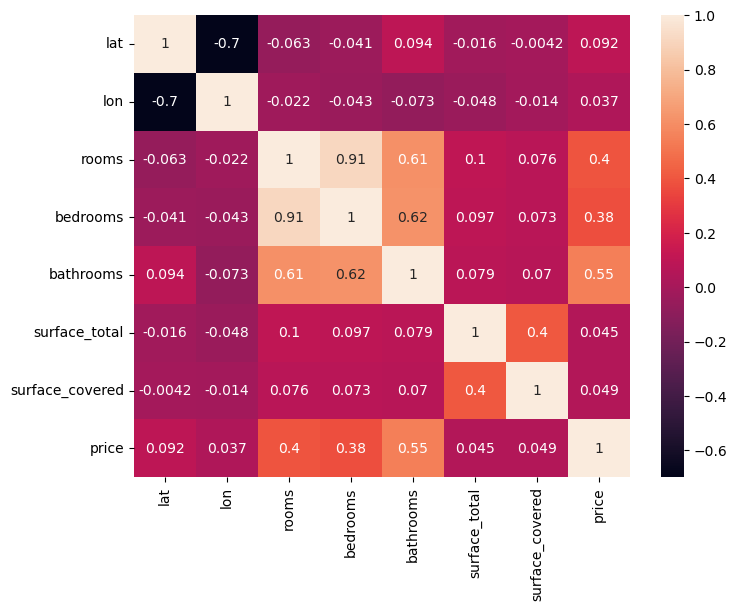

In [509]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True)
plt.show()

In [510]:
from geopandas import gpd
from shapely.geometry import Point

In [511]:
amba = gpd.GeoDataFrame.from_file('amba.shp')
amba

,geometry
0,"POLYGON ((-59.03972 -34.10997, -59.03948 -34.1..."
1,"POLYGON ((-57.84951 -34.88152, -57.84849 -34.8..."
2,"POLYGON ((-57.90032 -34.89049, -57.90001 -34.8..."
3,"POLYGON ((-58.25628 -35.16065, -58.25616 -35.1..."
4,"POLYGON ((-58.19457 -35.10541, -58.18782 -35.1..."
...,...
15118,"POLYGON ((-58.38212 -34.58430, -58.38125 -34.5..."
15119,"POLYGON ((-58.38119 -34.58483, -58.38002 -34.5..."
15120,"POLYGON ((-58.38086 -34.58431, -58.38047 -34.5..."
15121,"POLYGON ((-58.43532 -34.64905, -58.43496 -34.6..."


In [512]:
data['Coordinates'] = list(zip(data.lon, data.lat))
data['Coordinates'] = data['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(data, geometry='Coordinates')
print(gdf.head())

        start_date    end_date  created_on        lat        lon         l1  \
56672   2019-04-26  2019-08-17  2019-04-26 -34.673806 -59.042416  Argentina   
130136  2019-03-13  9999-12-31  2019-03-13 -34.674553 -59.039994  Argentina   
14153   2019-12-27  9999-12-31  2019-12-27 -34.606226 -59.038897  Argentina   
79038   2019-05-15  2019-10-10  2019-05-15 -34.606155 -59.038725  Argentina   
44354   2020-01-16  2020-01-16  2020-01-16 -34.594796 -59.032360  Argentina   

                              l2                 l3  rooms  bedrooms  ...  \
56672   Bs.As. G.B.A. Zona Oeste  General Rodríguez    4.0       1.0  ...   
130136  Bs.As. G.B.A. Zona Oeste  General Rodríguez    4.0       2.0  ...   
14153   Bs.As. G.B.A. Zona Oeste  General Rodríguez    6.0       4.0  ...   
79038   Bs.As. G.B.A. Zona Oeste  General Rodríguez    5.0       3.0  ...   
44354   Bs.As. G.B.A. Zona Oeste  General Rodríguez    3.0       2.0  ...   

        surface_covered     price  currency  \
56672          

<Axes: title={'center': 'Real estate in AMBA'}, xlabel='Lenght', ylabel='Latitude'>

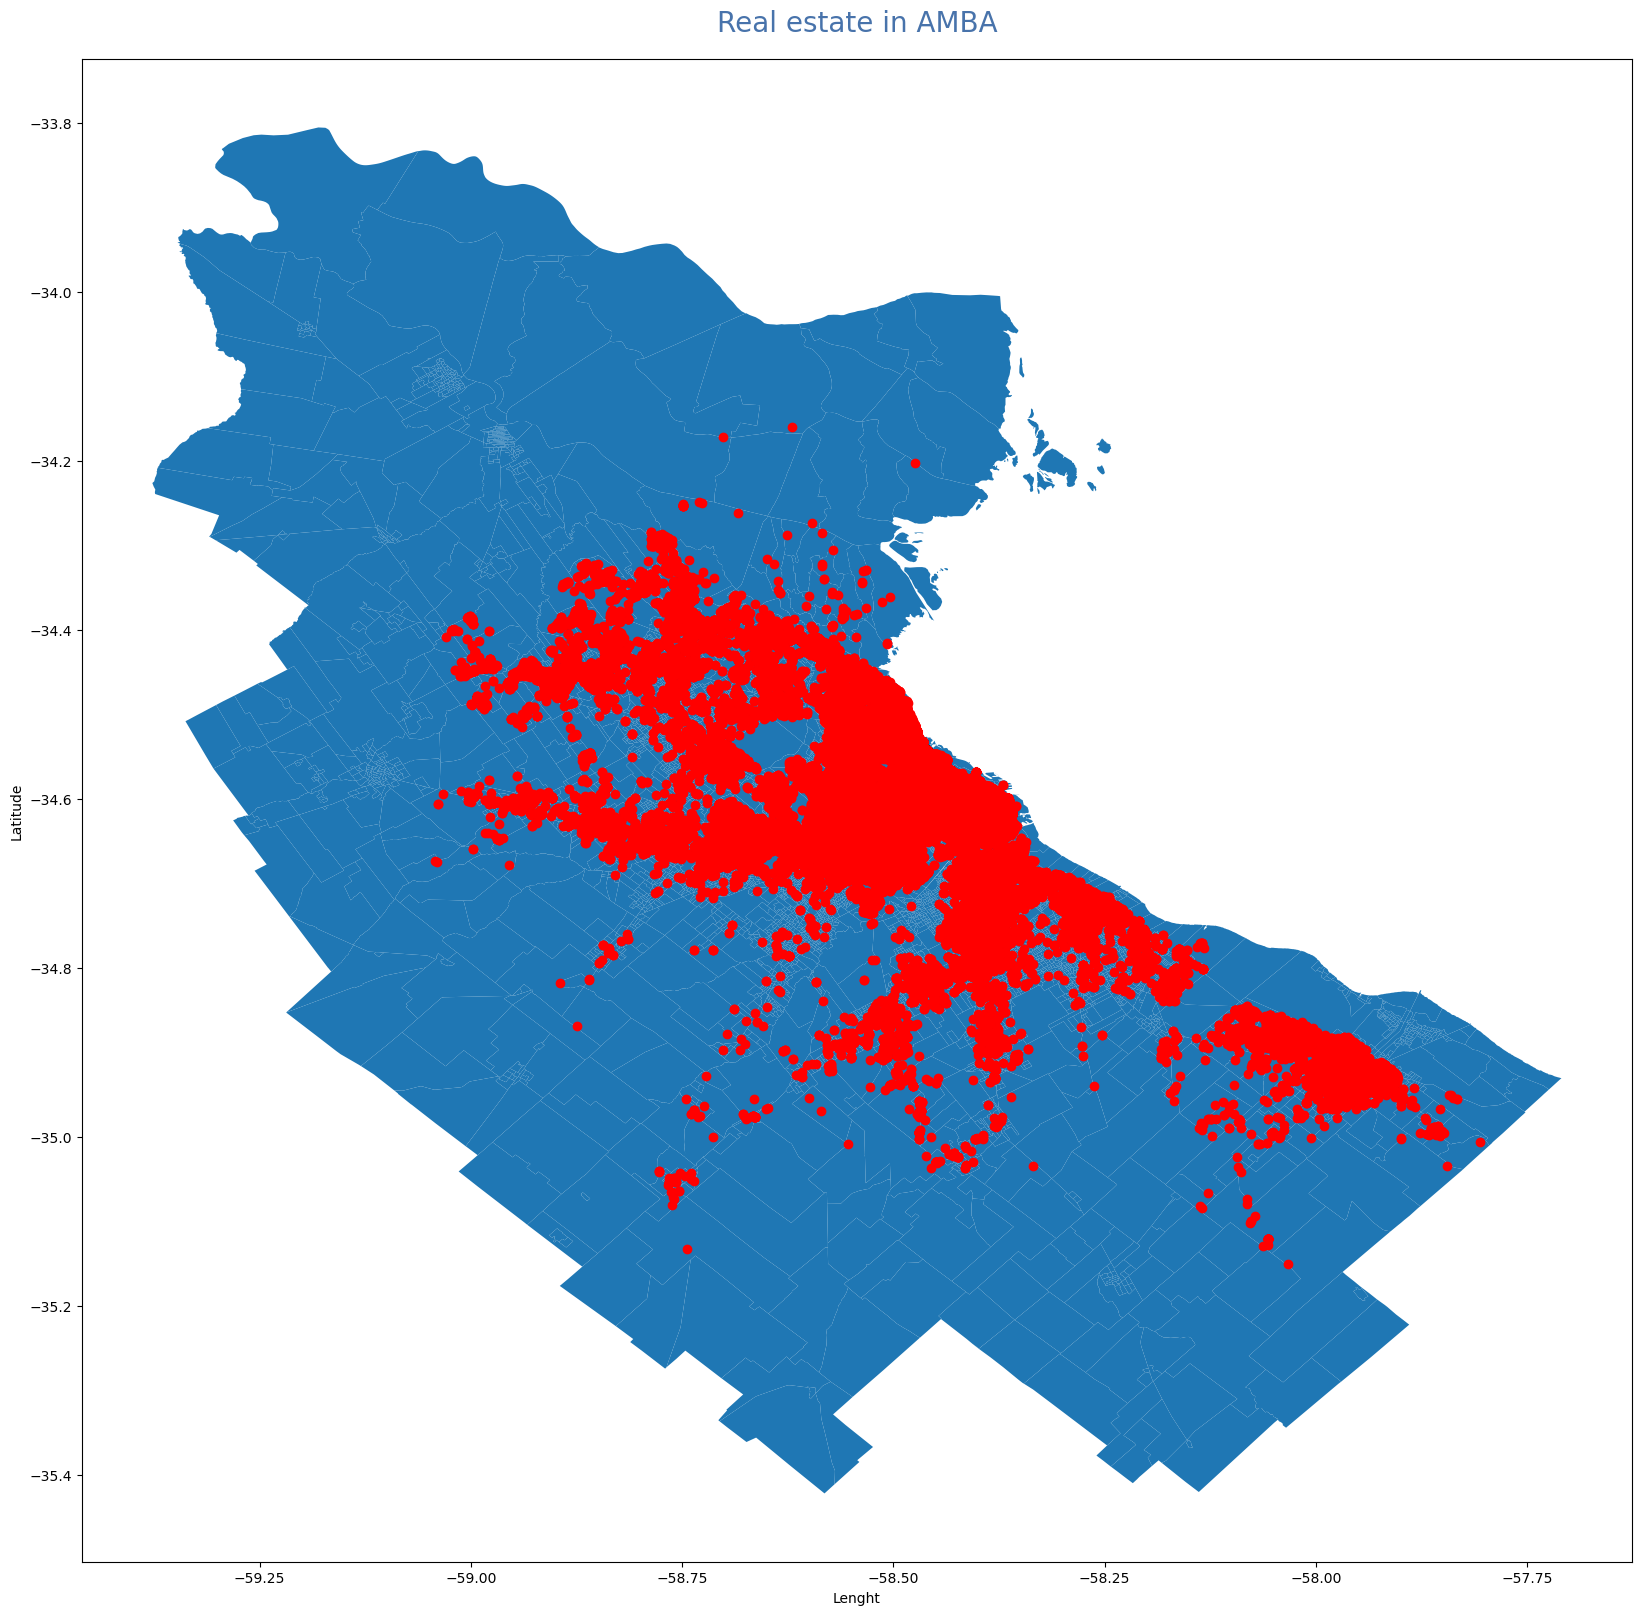

In [513]:
fig, ax = plt.subplots(figsize=(20, 20))
amba = gpd.read_file('amba.shp')
 
ax.set_title('Real estate in AMBA', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Lenght')
ax.set_ylabel('Latitude')
 
gdf.plot(ax=ax , zorder=5 , color='red')
amba.plot(ax=ax)